# Load Data

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

################################# Helper variables and methods ###########################
columns = ['CUSTOMER_ID','TOTAL_SALES', 'SALES_COUNT', 'MEAN', 'S.D', 'VAR', 'MIN', 'MAX', 'FIRST_VISIT', 'LAST_VISIT']
agg_funcs = {'SALES_AMOUNT' : ['sum','count','mean','std','var','min', 'max' ], 'SALES_dATE': ['min', 'max']}

def format_df(df):
    df = df.groupby(['CUSTOMER_ID'], as_index=False).agg(agg_funcs)
    df.columns  = df.columns.droplevel()
    df.columns = columns
    return df

def func_check_churn(row):
    if row['TOTAL_SALES'] > 0:
        val = 0
    elif row['TOTAL_SALES'] == 0:
        val = 1
    else:
        val = -1
    return val

def format_week_zero_df(df):
    df = df.groupby(['CUSTOMER_ID'], as_index=False)['SALES_AMOUNT'].agg({'TOTAL_SALES' : 'sum'})
    df['Churn'] = df.apply(func_check_churn, axis=1)
    return df
################################# Helper variables and methods ###########################


data = pd.read_csv('Customer_Sales_Transactional_Data_CSV.csv',  encoding='latin1', parse_dates=['SALES_dATE'])
df = data.copy()
df.head(5)

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT
0,2014-10-18,34810920,205.44
1,2014-09-22,1026037818,51.36
2,2014-09-30,1095693062,222.56
3,2014-10-25,15142688,171.20
4,2014-10-18,1022245368,171.20


**Missing Values**

There are no missing values present here.

In [15]:
df.isnull().values.any()

False

**Datatypes**

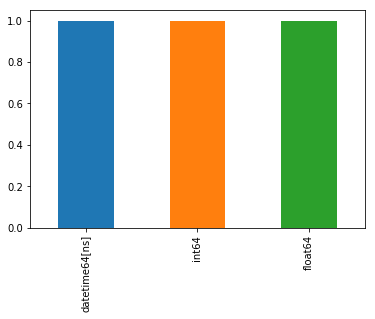

In [16]:
pp = pd.value_counts(df.dtypes)
pp.plot.bar()
plt.show()

**Calcualte Weeks**

In [42]:
df['SALES_WEEK'] = pd.DatetimeIndex(df['SALES_dATE']).week
df['SALES_WEEK'] = abs((df['SALES_WEEK'])-43)
df['SALES_WEEK'].unique()

array([1, 4, 3, 0, 2, 5])

In [43]:
week_zero = format_week_zero_df(df[df.SALES_WEEK==0])
week_one = format_df(df[df.SALES_WEEK==1])
week_two = format_df(df[df.SALES_WEEK==2])
week_three = format_df(df[df.SALES_WEEK==3])
week_four = format_df(df[df.SALES_WEEK==4])
week_five = format_df(df[df.SALES_WEEK==5])
overall = format_df(df[df.SALES_WEEK.isin([5,4,3,2,1])])

In [44]:
overall.head()

,CUSTOMER_ID,TOTAL_SALES,SALES_COUNT,MEAN,S.D,VAR,MIN,MAX,FIRST_VISIT,LAST_VISIT
0,488,171.20,1,171.200000,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
1,5194,599.20,1,599.200000,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
2,5398,102.72,2,51.360000,0.000000,0.000000,51.36,51.36,2014-09-23,2014-10-07
3,6930,599.20,6,99.866667,34.946054,1221.226667,85.60,171.20,2014-09-25,2014-10-15
4,7260,1968.80,14,140.628571,52.950181,2803.721705,68.48,256.80,2014-09-19,2014-10-19


In [28]:
week_five_four = 

SyntaxError: invalid syntax (<ipython-input-28-2bf064ac4496>, line 1)